# Simple Linear Regression TRM-WTI
Developed by Cristian Quintero : craquinterogo@unal.edu.co

In Colombia, oil prices have been recently related with TRM (Tasa Representativa del mercado), or is same, USD/COP price, in special after oil bonanza, at 2010 beginning. Today the oil price have experienced a downforward way, recentlly with slow recovering.

Here a small regression analysis to see if the correlation among TRM and WTI Future prices have relevance.

First, as any regression made in python, we have to import some libraries. In this case we will import the basic pandas and numpy libraries. After we will use sklearn to get access to linear_model class which is in charge of calculate the linear regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now, we will import WTI and TRM data, which are into Datos.xlsx and Datos_test.xlsx files. The first one is the data to get the regression parameters, and second one is to test the regression. The data are between 2014/10/24 and 2017/11/04.

In [2]:
# Lectura de las variables a utilizar en la regresion lineal
data_all = pd.read_excel('../data_source/Datos.xlsx','Datos')
test_cnt_data = 50
cnt_data = len(data_all)
data = data_all.tail(cnt_data - test_cnt_data)
data_test = data_all.head(test_cnt_data)
label_x = 'WTI'

Using linear_model, calculate regression using OLS. To get more information about it, see [linear_model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [3]:
y = data['TRM'].values
x = data[label_x].values
x = sm.add_constant(x)

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Return X to original matrix
x = x[:,1:2].T[0]

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     1183.
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          9.55e-162
Time:                        16:44:12   Log-Likelihood:                -5485.7
No. Observations:                 831   AIC:                         1.098e+04
Df Residuals:                     829   BIC:                         1.098e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4048.3867     34.620    116.939      0.000    3980.435    4116.339
x1           -23.8708      0.694    -34.389      0.000     -25.233     -22.508
==============================================================================
Omnibus:                      118.330   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.984
Skew:                          -0.961   Prob(JB):                     5.01e-40
Kurtosis:                       4.239   Cond. No.                         279.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we will predict TRM values taking in count the regression coefficients, over test values got above.

In [4]:
x_test = data_test[label_x].values
y_test = model.predict(sm.add_constant(x_test))
mse = mean_squared_error(y_test, y[-len(y_test):])
print('* MSE (Mean Square Error) : %.2f' %  mse)
print('  -      square root(mse) : %.2f' %  math.sqrt(mse))


* MSE (Mean Square Error) : 148479.50
  -      square root(mse) : 385.33


After we had gotten the TRM predicted values, we can plot the result, and see how the regression result adjust to the initial values.

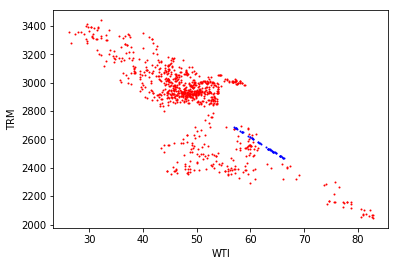

In [5]:
plt.scatter(x, y, color='red', s=1)
plt.scatter(x_test, y_test, color='blue', s=1)
plt.ylabel("TRM")
plt.xlabel(label_x)
plt.show()

Dots in red color are observations which we had into --Datos.xlsx-- file, while blue dots are the prediction using the --Datos_test.xlsx-- data, after calculate coefficients with linear_model library. As you can see, the predictions take a line form but is delimited by predictions range values.

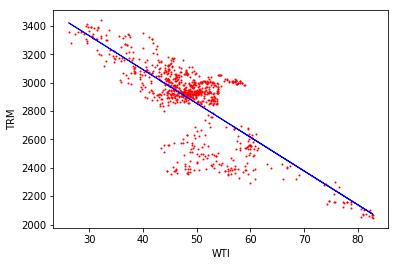

In [6]:
plt.scatter(x, y, color='red', s=1)
plt.plot(x, model.predict(sm.add_constant(x)), color='blue', linewidth=1)
plt.ylabel("TRM")
plt.xlabel(label_x)
plt.show()

__Conclusion__ The TRM level has inverse relationship with WTI futures price. This could have sense because in moments when oil has high levels, external funds arrive to Colombia, as portfolio investing in extract oil projects, otherwise when price oil level go downward and external economic variables hold either good or constant perspectives, foreign funds go out colombian economy to hold cost effectiveness.

__Note__ The coefficient result, is not a really true value which indicate absolute value of increment or decrement way, but can be used as reference to see which way will take TRM based on explanatory variable price movements.